<center style="font-size: 30px;">Lab1</center>

<p>1. Download data from one or more posts from https://www.saveecobot.com/.</p>
<p>2. Analyse the downloaded dataset and prepare it for work with it (formatting, deleting empty values, etc.).</p>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print('ok')

ok


In [7]:
df = pd.read_csv("saveecobot_19720.csv")
df

,device_id,phenomenon,value,logged_at,value_text
0,19720,temperature,6.1222,2021-12-10 14:30:00,NaN
1,19720,humidity,92.4375,2021-12-10 14:30:00,NaN
2,19720,pressure_pa,990375.0000,2021-12-10 14:30:00,NaN
3,19720,pm1,20.0020,2021-12-10 14:30:00,NaN
4,19720,pm25,21.6560,2021-12-10 14:30:00,NaN
...,...,...,...,...,...
3080887,19720,co_mg,0.3928,2024-09-08 23:00:00,NaN
3080888,19720,gamma,113.7500,2024-09-08 23:00:00,NaN
3080889,19720,no2_ppb,33.1258,2024-09-08 23:00:00,NaN
3080890,19720,so2_ppb,37.9133,2024-09-08 23:00:00,NaN


In [8]:
df = df.iloc[:, :-1]
df


,device_id,phenomenon,value,logged_at
0,19720,temperature,6.1222,2021-12-10 14:30:00
1,19720,humidity,92.4375,2021-12-10 14:30:00
2,19720,pressure_pa,990375.0000,2021-12-10 14:30:00
3,19720,pm1,20.0020,2021-12-10 14:30:00
4,19720,pm25,21.6560,2021-12-10 14:30:00
...,...,...,...,...
3080887,19720,co_mg,0.3928,2024-09-08 23:00:00
3080888,19720,gamma,113.7500,2024-09-08 23:00:00
3080889,19720,no2_ppb,33.1258,2024-09-08 23:00:00
3080890,19720,so2_ppb,37.9133,2024-09-08 23:00:00


In [9]:
df.isnull().values.any()


np.False_

In [10]:
df.describe()


,device_id,value
count,3080892.0,3.080892e+06
mean,19720.0,7.712178e+04
std,0.0,2.656152e+05
min,19720.0,-1.758180e+01
25%,19720.0,2.372200e+00
50%,19720.0,9.937500e+00
75%,19720.0,3.400000e+01
max,19720.0,1.021960e+06


In [11]:
unique_phenomena = df['phenomenon'].unique()
unique_phenomena

array(['temperature', 'humidity', 'pressure_pa', 'pm1', 'pm25', 'pm10',
       'no2_ug', 'so2_ug', 'co_mg', 'no2_ppb', 'so2_ppb', 'co_ppm',
       'gamma'], dtype=object)

In [12]:
df_pm25 = df[df['phenomenon'] == 'pm25']
df_co_ppm = df[df['phenomenon'] == 'co_ppm']

In [13]:
df['logged_at'] = pd.to_datetime(df['logged_at'])

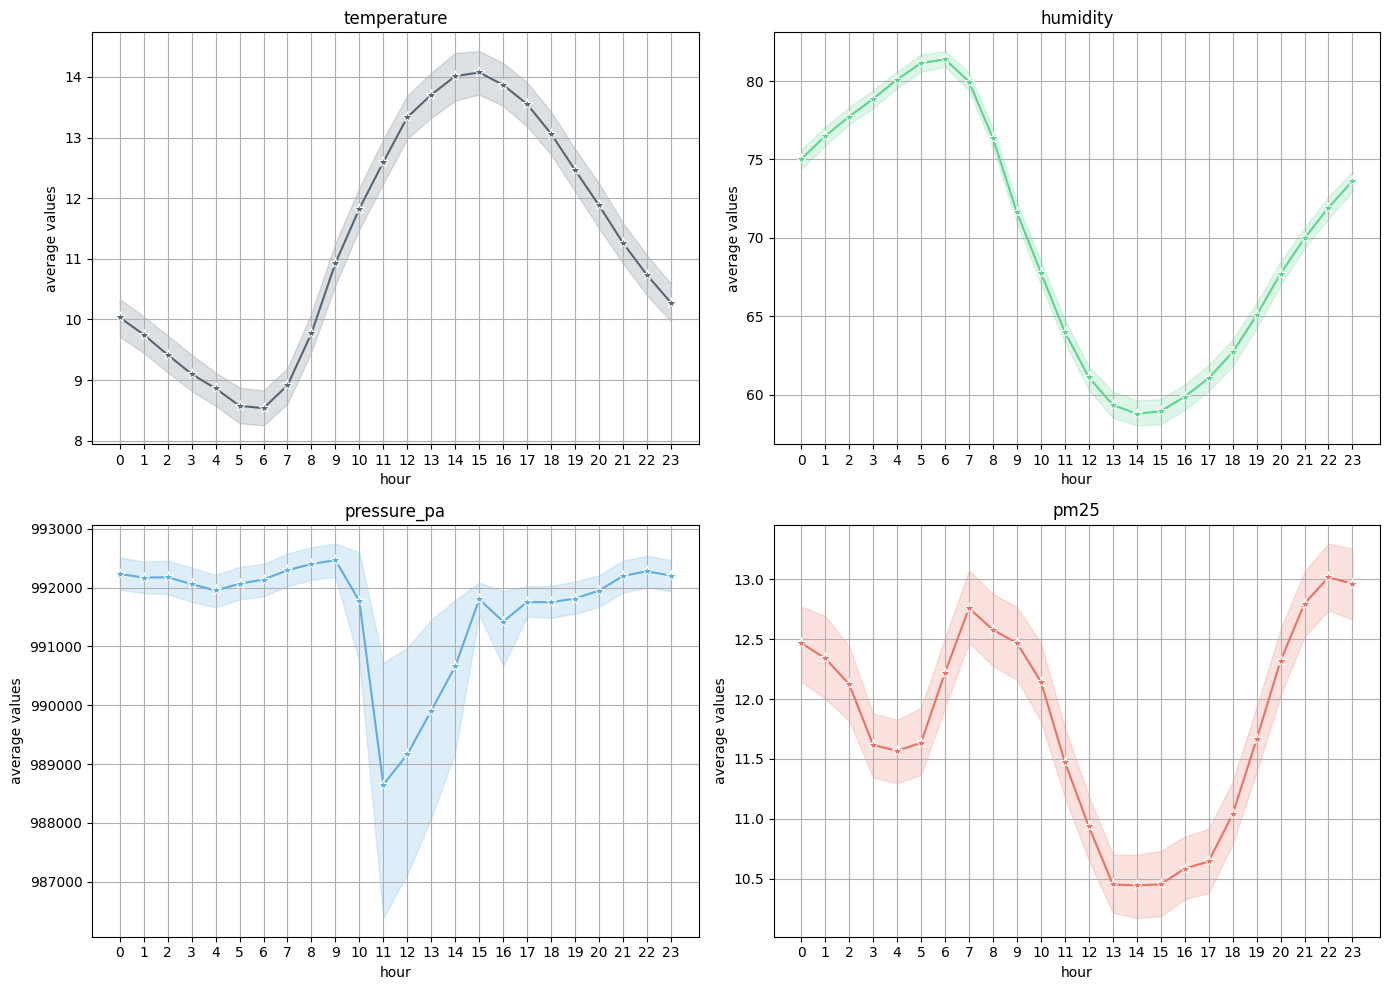

In [26]:
df['hour'] = df['logged_at'].dt.hour
df_pivot = df.pivot_table(index=['logged_at', 'hour'], columns='phenomenon', values='value').reset_index()

# Список феноменів для візуалізації
variables = ['temperature', 'humidity', 'pressure_pa', 'pm25']

# Налаштування кольорів і стилів
colors = ['#566573', '#58d68d', '#5dade2', '#ec7063']  
markers = ['*', '*', '*', '*'] 

# Створення графіків
plt.figure(figsize=(14, 10))

for i, (category, color, marker) in enumerate(zip(variables, colors, markers), 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df_pivot, x='hour', y=category, color=color, marker=marker, markersize=8)
    plt.title(f'{category}', fontsize=12)
    plt.xlabel('hour', fontsize=10)
    plt.ylabel('average values', fontsize=10)
    plt.grid(True)
    plt.xticks(range(0, 24))  # Modified to include hours from 0 to 23

plt.tight_layout()
plt.show()


In [ ]:
df['month'] = df['logged_at'].dt.month

<p>Find possible dependencies between air pollutants (does PM2.5 depend on carbon monoxide, etc.). Do this using regression analysis</p>